In [28]:
import pandas as pd

In [29]:

file_path = '../../data/processed/feature_selected_data.parquet'
df = pd.read_parquet(file_path, engine= 'pyarrow')

In [30]:
df.columns

Index(['id_prenotazione', 'id_paziente', 'data_nascita', 'sesso',
       'regione_residenza', 'asl_residenza', 'provincia_residenza',
       'comune_residenza', 'tipologia_servizio', 'descrizione_attivita',
       'data_contatto', 'regione_erogazione', 'asl_erogazione',
       'provincia_erogazione', 'struttura_erogazione',
       'codice_struttura_erogazione', 'tipologia_struttura_erogazione',
       'id_professionista_sanitario', 'tipologia_professionista_sanitario',
       'data_erogazione', 'durata_erogazione_min', 'eta'],
      dtype='object')

In [31]:
df['data_erogazione'] = pd.to_datetime(df['data_erogazione'], utc=True)

df['anno'] = df['data_erogazione'].dt.year
df['quadrimestre'] = df['data_erogazione'].dt.quarter


In [32]:
df.head()

,id_prenotazione,id_paziente,data_nascita,sesso,regione_residenza,asl_residenza,provincia_residenza,comune_residenza,tipologia_servizio,descrizione_attivita,...,struttura_erogazione,codice_struttura_erogazione,tipologia_struttura_erogazione,id_professionista_sanitario,tipologia_professionista_sanitario,data_erogazione,durata_erogazione_min,eta,anno,quadrimestre
0,JUOCPQCUG1H96QO,LCWFXF28X79P382V,1980-04-24 00:00:00+00:00,male,Piemonte,CN1,Cuneo,Fossano,Teleassistenza,Insegnamento al paziente e/o alla sua famiglia...,...,AZ. OSPEDAL. S. CROCE E CARLE,10906,Azienda Ospedaliera,MZRAER00D13A287J,Infermiere,2019-02-04 10:00:00+00:00,2925.0,44,2019,1
1,XDP99NXRHPOYFYU,LRFZOI94E58U012I,1972-01-30 00:00:00+00:00,female,Toscana,AZIENDA USL TOSCANA CENTRO,Firenze,Calenzano,Teleassistenza,Prestazione infermieristica connessa alla nece...,...,AZIENDA OSPEDALIERA MEYER,90904,Azienda Ospedaliera Universitaria,EBCRPU12T24U316I,Infermiere,2019-02-01 10:00:00+00:00,1895.0,52,2019,1
2,6VYI0AK57ECO5WU,JOBCGJ98A04B765H,1986-06-27 00:00:00+00:00,male,Emilia romagna,AZIENDA USL BOLOGNA,Bologna,Bologna,Teleassistenza,Prestazione dietistica,...,PRESIDIO OSPEDALIERO UNICO - AZIENDA DI,80053,Ospedale a gestione diretta,PMEJNL62M27F357I,Dietista,2019-02-03 06:00:00+00:00,1165.0,38,2019,1
3,VLFS5J9E3Q74Q2W,TKROSE51Z77Q065E,1967-10-21 00:00:00+00:00,female,Campania,A.S.L. NAPOLI 1 CENTRO,Napoli,Napoli,Teleassistenza,Psicoterapia individuale,...,A.O.R.N. SANTOBONO-PAUSILIPON,150902,Azienda Ospedaliera,VNNRMQ15C69W200K,Psicologo,2019-02-01 06:00:00+00:00,1969.0,56,2019,1
4,XD8SZX9JOVCMEXW,WRRVSK73Z45L640S,1963-08-24 00:00:00+00:00,male,Abruzzo,PESCARA,Pescara,Pescara,Teleassistenza,Prestazione dietistica,...,P.O. 'SPIRITO SANTO' PESCARA,130018,Ospedale a gestione diretta,GIQCNR34T04P154U,Dietista,2019-02-05 14:00:00+00:00,3099.0,61,2019,1


In [33]:
grouped = df.groupby(['anno', 'quadrimestre', 'regione_erogazione']).size().reset_index(name='num_servizi')

In [34]:
grouped.sort_values(by=['num_servizi'], ascending=True)

,anno,quadrimestre,regione_erogazione,num_servizi
19,2019,1,Valle d`aosta,23
40,2019,2,Valle d`aosta,31
12,2019,1,Prov. auton. bolzano,43
10,2019,1,Molise,43
313,2022,3,Valle d`aosta,44
...,...,...,...,...
218,2021,3,Lombardia,5475
197,2021,2,Lombardia,5554
134,2020,3,Lombardia,5735
176,2021,1,Lombardia,6785


In [35]:
# Calcolo dell'incremento per ogni quadrimestre
grouped['incremento'] = grouped.groupby(['quadrimestre', 'regione_erogazione'])['num_servizi'].diff()


In [36]:
grouped.sort_values(by=['incremento'], ascending=False)

,anno,quadrimestre,regione_erogazione,num_servizi,incremento
155,2020,4,Lombardia,7055,3297.0
92,2020,1,Lombardia,4379,2883.0
176,2021,1,Lombardia,6785,2406.0
153,2020,4,Lazio,5024,2285.0
150,2020,4,Campania,4808,2099.0
...,...,...,...,...,...
79,2019,4,Sicilia,2259,NaN
80,2019,4,Toscana,784,NaN
81,2019,4,Umbria,328,NaN
82,2019,4,Valle d`aosta,54,NaN


In [37]:
mask = (grouped['regione_erogazione'] == 'Sicilia') & (grouped['quadrimestre'] == 4)
grouped[mask]

,anno,quadrimestre,regione_erogazione,num_servizi,incremento
79,2019,4,Sicilia,2259,NaN
163,2020,4,Sicilia,4122,1863.0
247,2021,4,Sicilia,2711,-1411.0
331,2022,4,Sicilia,2615,-96.0


In [38]:
# Elimino i campioni con incremento nullo, sono quelli del 2019 (primo anno storicizzato)
# grouped = grouped.dropna(subset=['incremento'])

In [39]:

# Calcolo dell'incremento percentuale
grouped['incremento_percentuale'] = grouped['incremento'] / grouped.groupby(['quadrimestre', 'regione_erogazione'])['num_servizi'].shift(1) * 100   # shift(1) per avere il valore precedente

# Calcolo dell'incremento percentuale medio per ogni coppia di quadrimestre e regione_erogazione
incremento_percentuale_medio = grouped.groupby(['quadrimestre', 'regione_erogazione'])['incremento_percentuale'].mean().reset_index()

# Visualizza il risultato
app = incremento_percentuale_medio.sort_values(by=['incremento_percentuale'], ascending=False)
app

,quadrimestre,regione_erogazione,incremento_percentuale
12,1,Prov. auton. bolzano,85.685368
5,1,Friuli venezia giulia,78.437573
9,1,Marche,78.050608
8,1,Lombardia,72.727056
6,1,Lazio,72.588215
...,...,...,...
58,3,Sicilia,8.986435
45,3,Campania,7.511571
43,3,Basilicata,6.837010
30,2,Marche,3.745533


In [40]:
mask = (grouped['regione_erogazione'] == 'Sardegna') & (grouped['quadrimestre'] == 4)
grouped[mask]

,anno,quadrimestre,regione_erogazione,num_servizi,incremento,incremento_percentuale
78,2019,4,Sardegna,115,NaN,NaN
162,2020,4,Sardegna,268,153.0,133.043478
246,2021,4,Sardegna,158,-110.0,-41.044776
330,2022,4,Sardegna,136,-22.0,-13.924051


Per studiare i dati e determinare le soglie appropriate per l'assegnazione delle etichette, puoi seguire alcuni passaggi che ti aiuteranno a comprendere meglio la distribuzione degli incrementi percentuali. Ecco una guida pratica su come fare:

1. Esplora la Distribuzione degli Incrementi Percentuali
Distribuzione: 
- Usa un istogramma o un grafico a densità per visualizzare la distribuzione degli incrementi percentuali.
- Statistica Descrittiva: Calcola metriche come la media, la mediana, i quartili, e la deviazione standard.

2. Identifica Valori Estremi (Outliers)
- Gli outlier possono influenzare significativamente le soglie. Identificare e, se necessario, trattare questi valori può essere utile.
- Puoi usare boxplot o interquartile range (IQR) per individuare gli outlier.

3. Segmentazione basata su Quartili
- I quartili (Q1, Q2, Q3) dividono i dati in quattro parti uguali. Usarli per definire le soglie può aiutarti a segmentare in modo equilibrato.

4. Visualizzazione dei Dati
- Scatter plot: Un grafico scatter può aiutare a vedere la relazione tra l'anno e l'incremento percentuale.
- Boxplot: Un boxplot mostra la distribuzione e può evidenziare outlier e valori medi.

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns


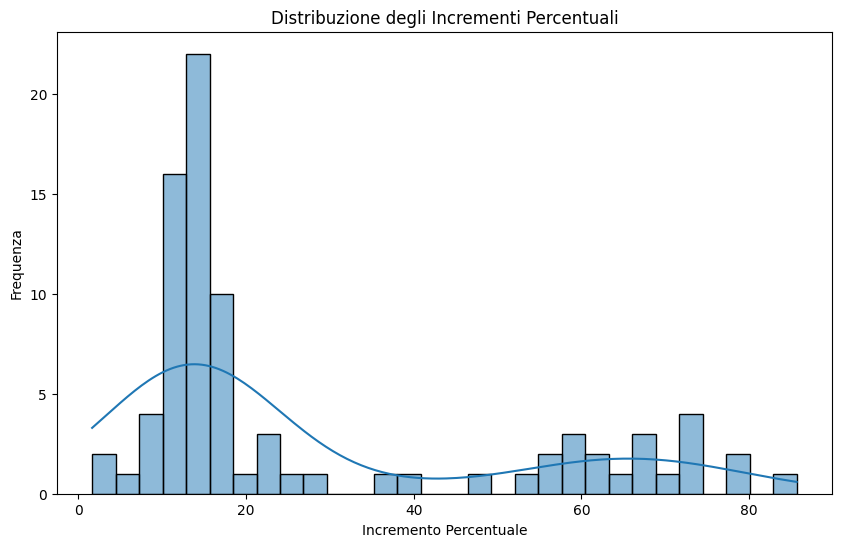

In [42]:
# Calcola la distribuzione degli incrementi percentuali
plt.figure(figsize=(10, 6))
sns.histplot(incremento_percentuale_medio['incremento_percentuale'], bins=30, kde=True)
plt.title('Distribuzione degli Incrementi Percentuali')
plt.xlabel('Incremento Percentuale')
plt.ylabel('Frequenza')
plt.show()

In [43]:
# Statistiche descrittive
descr = incremento_percentuale_medio['incremento_percentuale'].describe()
print(descr)

count    84.000000
mean     27.496611
std      23.395760
min       1.636089
25%      12.056031
50%      15.252433
75%      40.652561
max      85.685368
Name: incremento_percentuale, dtype: float64


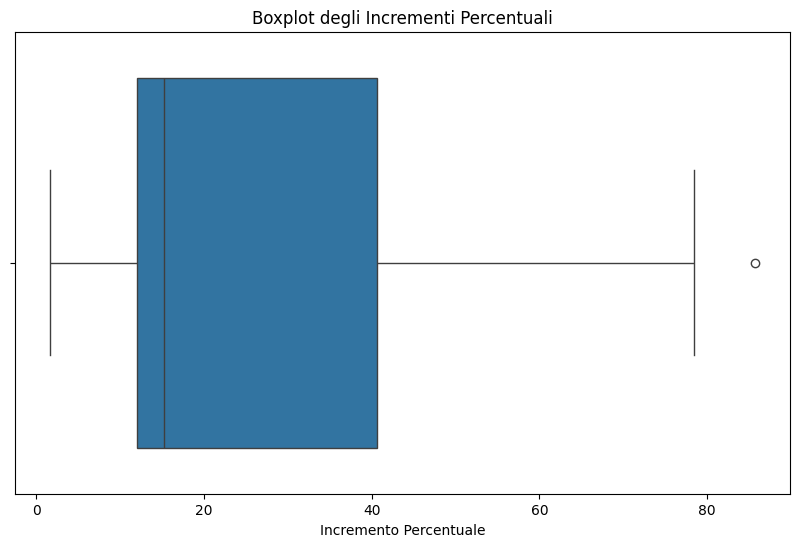

In [44]:
# Boxplot per identificare outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=incremento_percentuale_medio['incremento_percentuale'])
plt.title('Boxplot degli Incrementi Percentuali')
plt.xlabel('Incremento Percentuale')
plt.show()

In [45]:
def classify_increment(value):
    constat_increment = 5 
    low_increment = 15
    medium_increment = 40


    if value <= constat_increment:
        return 'constant_increment'
    elif value <= low_increment:
        return 'low_increment'
    elif value <= medium_increment:
        return 'medium_increment'
    elif value > medium_increment:
        return 'high_increment'
    else:
        return 'decrement'

In [46]:
incremento_percentuale_medio['incremento_teleassistenze'] = incremento_percentuale_medio['incremento_percentuale'].apply(classify_increment)

In [47]:
incremento_percentuale_medio.sort_values(by=['incremento_percentuale'], ascending=False)

,quadrimestre,regione_erogazione,incremento_percentuale,incremento_teleassistenze
12,1,Prov. auton. bolzano,85.685368,high_increment
5,1,Friuli venezia giulia,78.437573,high_increment
9,1,Marche,78.050608,high_increment
8,1,Lombardia,72.727056,high_increment
6,1,Lazio,72.588215,high_increment
...,...,...,...,...
58,3,Sicilia,8.986435,low_increment
45,3,Campania,7.511571,low_increment
43,3,Basilicata,6.837010,low_increment
30,2,Marche,3.745533,constant_increment


In [48]:
df['incremento_teleassistenze'] = df.apply(lambda x: incremento_percentuale_medio.loc[(incremento_percentuale_medio['regione_erogazione'] == x['regione_erogazione']) & (incremento_percentuale_medio['quadrimestre'] == x['quadrimestre'])]['incremento_teleassistenze'].values[0], axis=1)

In [ ]:
df
